# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

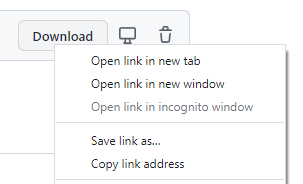

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

In [65]:
df = pd.read_csv(r'https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23/blob/2216f09f34622924b4eccaff240ad33e4145d9cc/Ruchira_Vishwanath_Joshi.csv?raw=true')

**Display the dataset (2 points)**

In [66]:
print (df)

      Age     Sex              Race               Ethnicity  Height (cm)  \
0    36.0    Male             Asian  Not Hispanic or Latino        197.0   
1    23.0  Female   Native American  Not Hispanic or Latino        188.0   
2    39.0    Male             Other      Hispanic or Latino        190.0   
3    58.0  Female             Other  Not Hispanic or Latino        187.0   
4    30.0  Female           Unknown      Hispanic or Latino        187.0   
..    ...     ...               ...                     ...          ...   
995  61.0    Male         Caucasian      Hispanic or Latino        191.0   
996  66.0    Male             Other      Hispanic or Latino        207.0   
997  17.0    Male  Pacific Islander      Hispanic or Latino        168.0   
998  37.0  Female         Caucasian  Not Hispanic or Latino        195.0   
999  78.0  Female             Other      Hispanic or Latino        203.0   

     Weight (kg) Smoking history  Pre-treatment NT-proBNP (pg/mL)  \
0           74.0  

## **Data cleaning (16 points)**


**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [67]:
print(df.isnull().sum())

Age                                       0
Sex                                       1
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           1
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  2
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     1
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   2
Hyperkalemia                              0
Death                                     0
dtype: int64


In [68]:
print(df.dtypes)

Age                                       float64
Sex                                        object
Race                                       object
Ethnicity                                  object
Height (cm)                               float64
Weight (kg)                               float64
Smoking history                            object
Pre-treatment NT-proBNP (pg/mL)           float64
Week 4 NT-proBNP (pg/mL)                  float64
Week 8 NT-proBNP (pg/mL)                  float64
Pre-treatment BNP (pg/mL)                 float64
Prior use of ACEi/ARB                      object
Left ventricular ejection fraction (%)    float64
Chronic renal insufficiency                object
Group                                      object
Symptomatic hypotension                    object
Hyperkalemia                               object
Death                                      object
dtype: object


In [69]:
#Dropping NaN values in numerical data and checking total number again
dfcleaned = df.dropna(subset=['Week 4 NT-proBNP (pg/mL)'],how='any')
print(dfcleaned.isnull().sum())



Age                                       0
Sex                                       1
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           1
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     1
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   2
Hyperkalemia                              0
Death                                     0
dtype: int64


In [70]:
#Converting NaN values in categorical data and checking total number again
df_cleaned = dfcleaned.fillna("Not Given")
print(df_cleaned.isnull().sum())

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64


**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [71]:
df_final = df_cleaned.loc[(df["Age"] >= 18) & (df_cleaned["Pre-treatment NT-proBNP (pg/mL)"] >= 1600) & (df_cleaned["Pre-treatment BNP (pg/mL)"] >= 400) & (df_cleaned["Left ventricular ejection fraction (%)"] <= 40)]
print(df_final)
len(df_final)

      Age     Sex             Race               Ethnicity  Height (cm)  \
0    36.0    Male            Asian  Not Hispanic or Latino        197.0   
1    23.0  Female  Native American  Not Hispanic or Latino        188.0   
2    39.0    Male            Other      Hispanic or Latino        190.0   
3    58.0  Female            Other  Not Hispanic or Latino        187.0   
4    30.0  Female          Unknown      Hispanic or Latino        187.0   
..    ...     ...              ...                     ...          ...   
993  77.0  Female        Caucasian  Not Hispanic or Latino        194.0   
994  27.0    Male            Asian      Hispanic or Latino        193.0   
996  66.0    Male            Other      Hispanic or Latino        207.0   
998  37.0  Female        Caucasian  Not Hispanic or Latino        195.0   
999  78.0  Female            Other      Hispanic or Latino        203.0   

     Weight (kg) Smoking history  Pre-treatment NT-proBNP (pg/mL)  \
0           74.0           nev

908

**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [72]:
height_m = df_final ["Height (cm)"] / 100
df_final["BMI (kg/m^2)"] = (df_final["Weight (kg)"]) / (height_m ** 2)
print(df_final)

      Age     Sex             Race               Ethnicity  Height (cm)  \
0    36.0    Male            Asian  Not Hispanic or Latino        197.0   
1    23.0  Female  Native American  Not Hispanic or Latino        188.0   
2    39.0    Male            Other      Hispanic or Latino        190.0   
3    58.0  Female            Other  Not Hispanic or Latino        187.0   
4    30.0  Female          Unknown      Hispanic or Latino        187.0   
..    ...     ...              ...                     ...          ...   
993  77.0  Female        Caucasian  Not Hispanic or Latino        194.0   
994  27.0    Male            Asian      Hispanic or Latino        193.0   
996  66.0    Male            Other      Hispanic or Latino        207.0   
998  37.0  Female        Caucasian  Not Hispanic or Latino        195.0   
999  78.0  Female            Other      Hispanic or Latino        203.0   

     Weight (kg) Smoking history  Pre-treatment NT-proBNP (pg/mL)  \
0           74.0           nev

<ipython-input-72-5521ba92297a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["BMI (kg/m^2)"] = (df_final["Weight (kg)"]) / (height_m ** 2)


In [73]:
print(df_final.isnull().sum())

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
BMI (kg/m^2)                              0
dtype: int64


## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



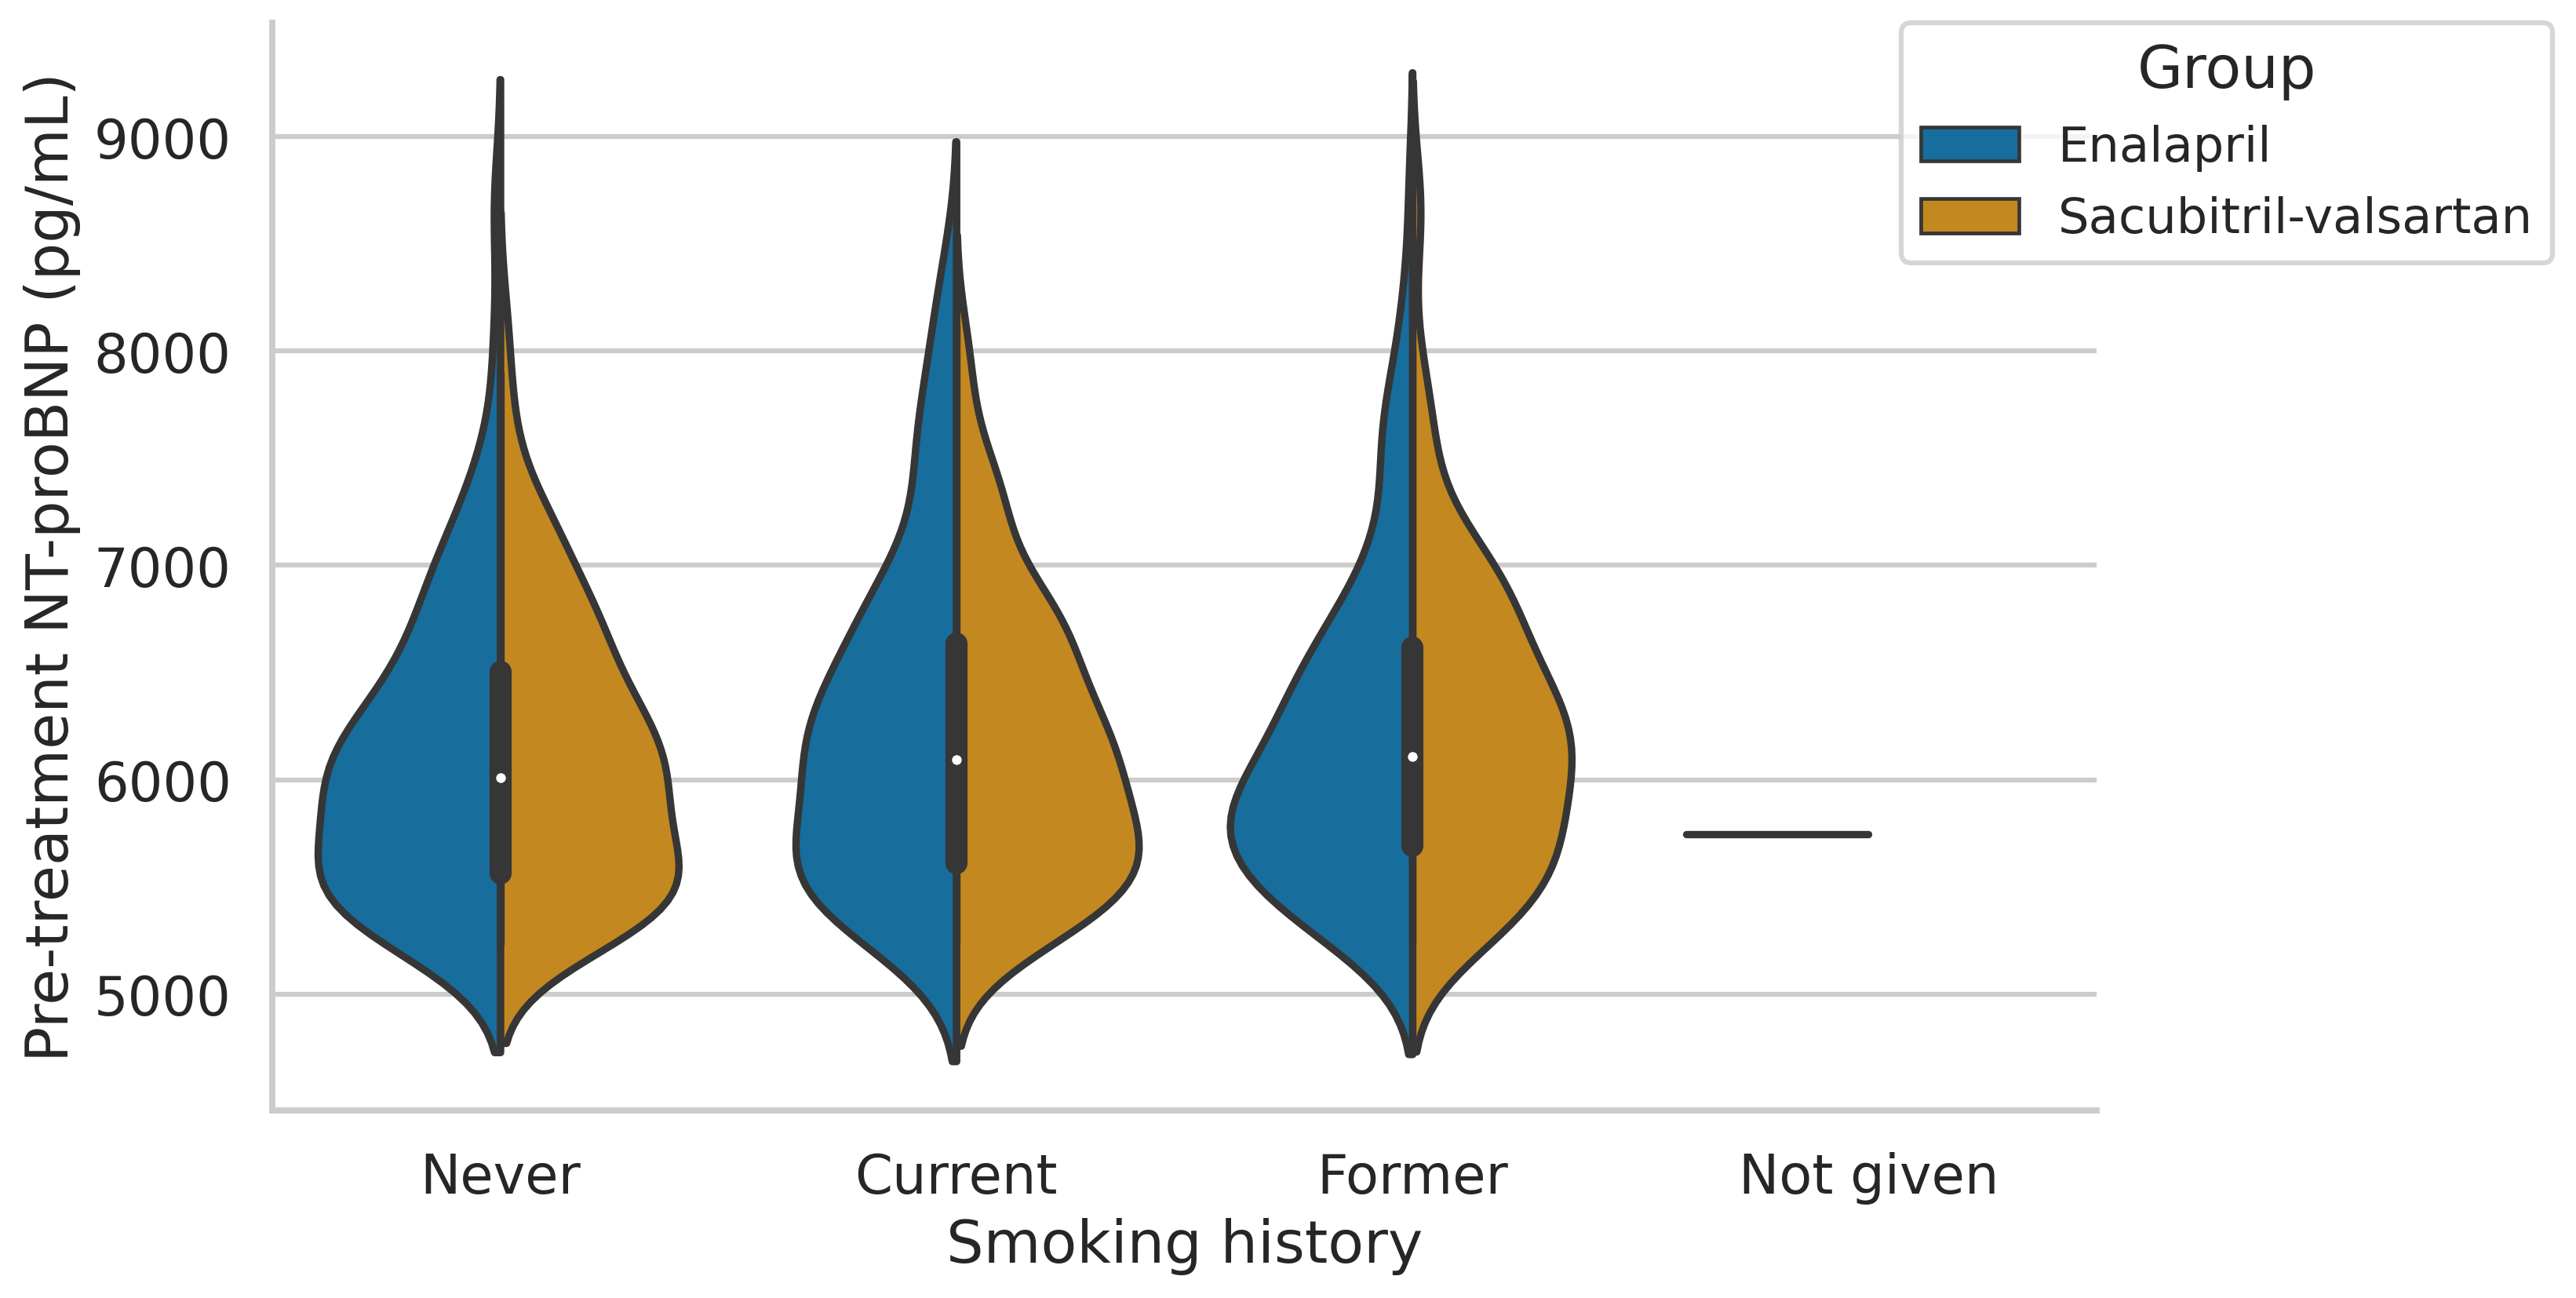

In [74]:
#CHANGE SAVING PLOT PATH
plt.figure(figsize = (10,6), dpi = 300)
#Using one of Seaborn's Plot-Styles
sns.set_style("whitegrid")
#Using one of Seaborn's Plot-Contexts
sns.set_context("talk")
#Plotting violin plot
ax = sns.violinplot (data = df_final, x = "Smoking history", y = "Pre-treatment NT-proBNP (pg/mL)", hue = "Group", split = True, density_norm = "count", inner = "box", palette = "colorblind")
#Adjusting legend size and position
legend = ax.legend(title = "Group", loc = "upper right", bbox_to_anchor = (1.25, 1), borderaxespad = 0., fontsize = "small")
legend.get_title().set_fontsize("medium")
#Customizing major ticks on x-axis
custom_labels = ["Never", "Current", "Former","Not given"] #Customizing major ticks on x-axis
ax.set_xticklabels(custom_labels)
#Despining the plot
sns.despine()
#Saving the plot in vector form (.pdf) and using bbox_inches='tight'
plt.savefig("Violinplot.pdf", bbox_inches = "tight")

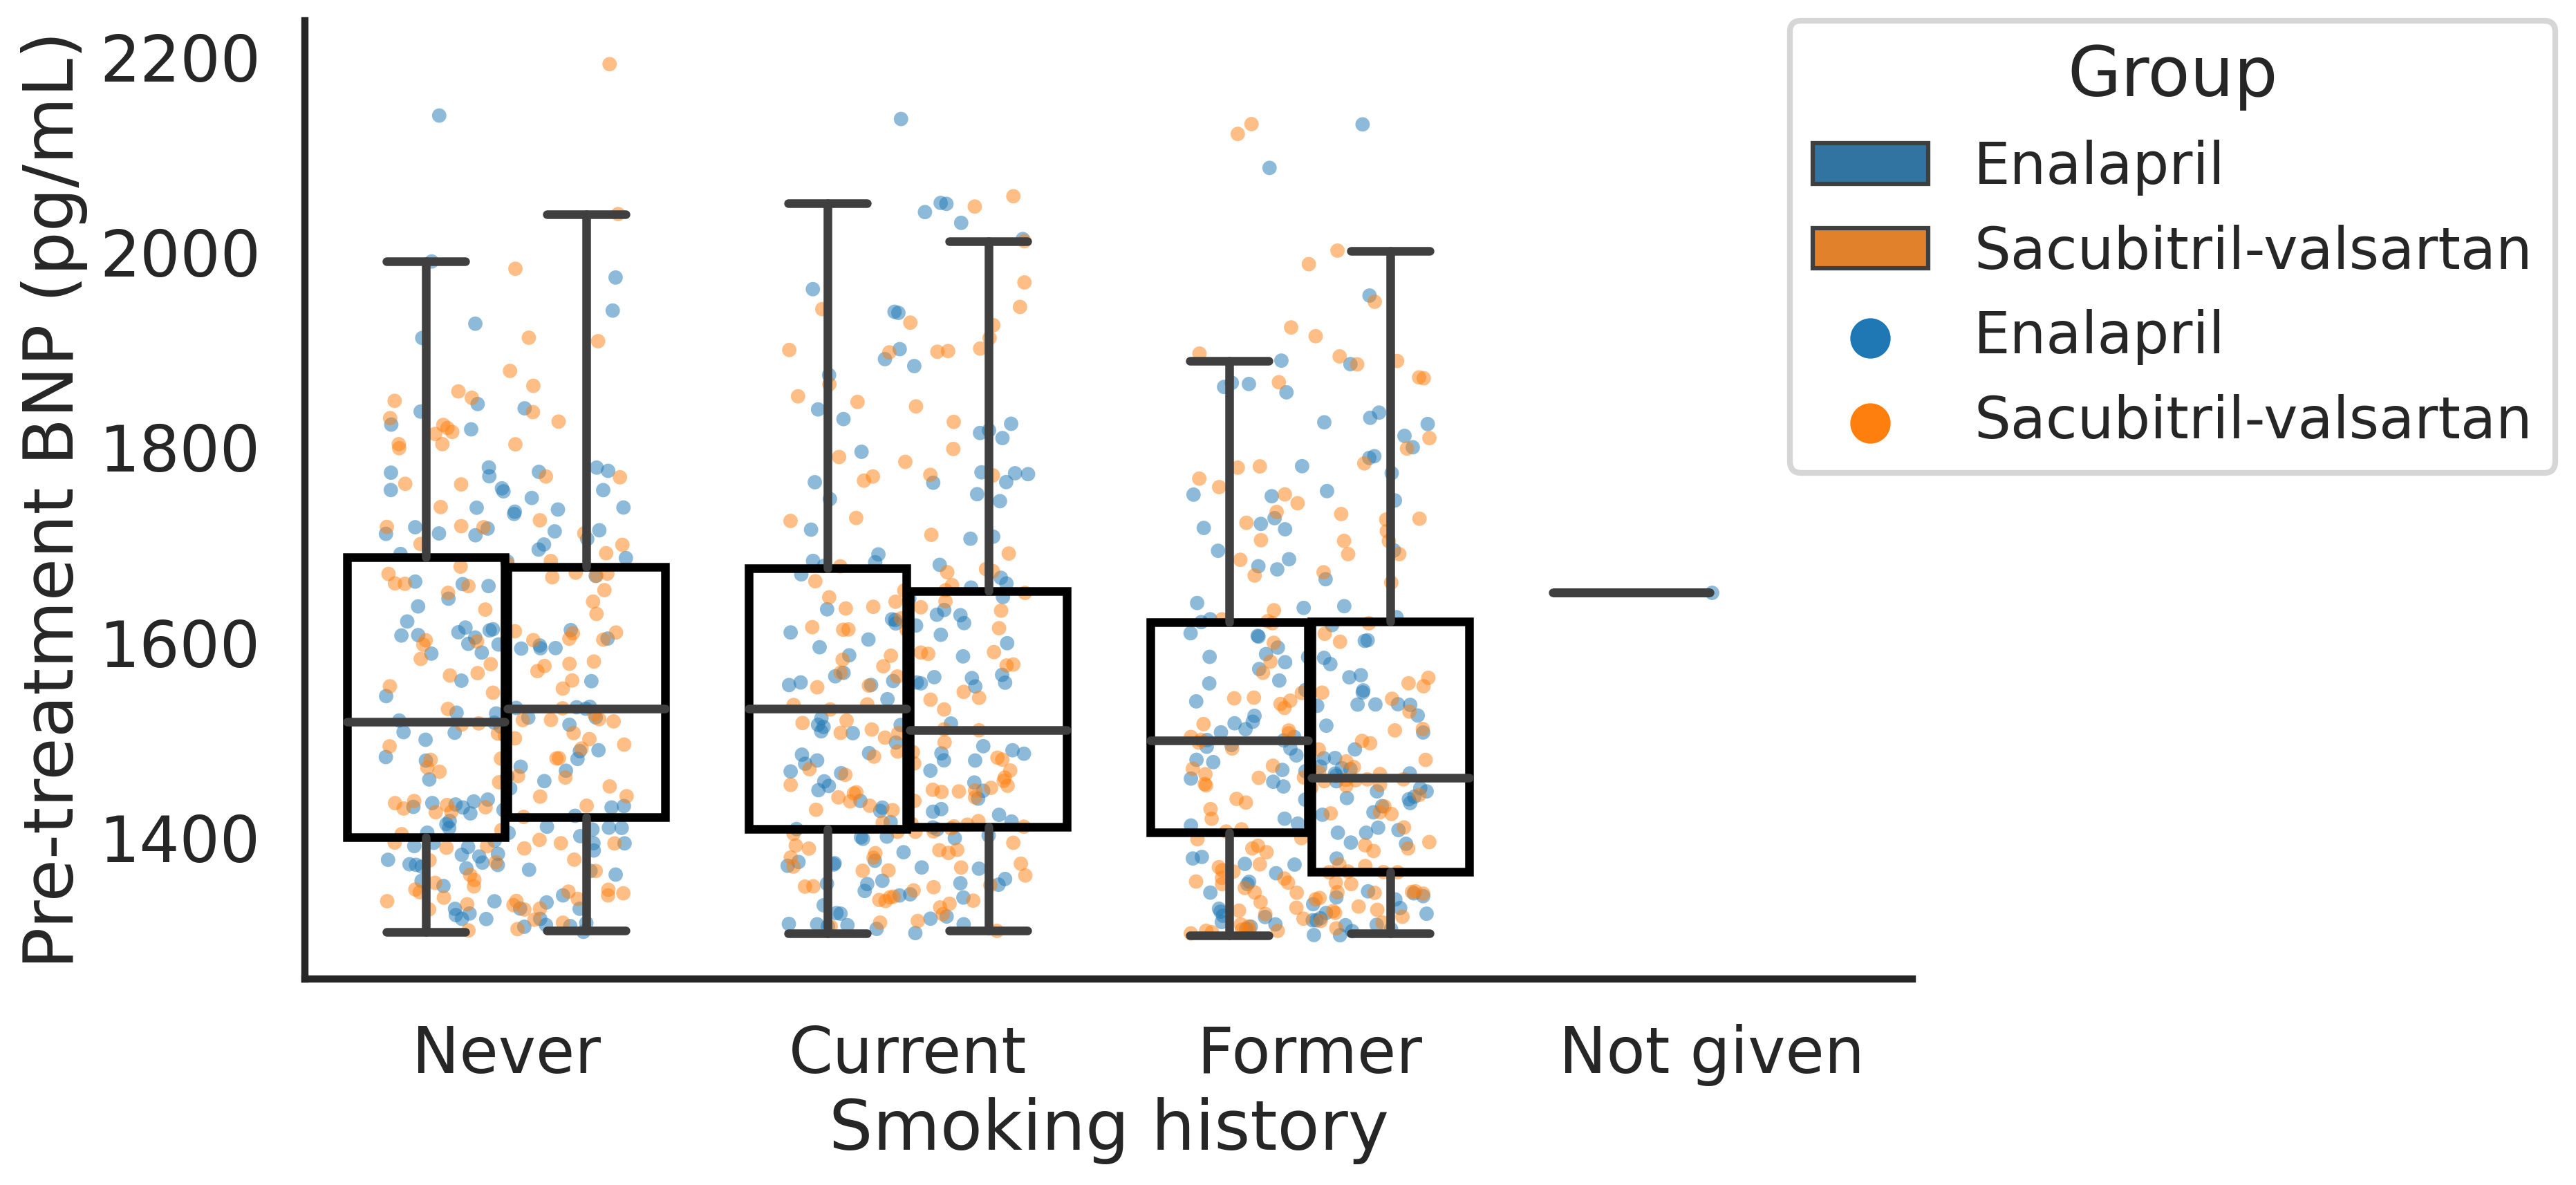

In [75]:
#CHANGE PLOT PATH WHERE IT IS SAVED
plt.figure(figsize = (10,6), dpi = 300)
#Using one of Seaborn's Plot-Styles
sns.set_style("white")
#Using one of Seaborn's Plot-Contexts
sns.set_context("poster")
#Plotting bar plot
ax2 = sns.boxplot(data=df_final, x="Smoking history", y="Pre-treatment BNP (pg/mL)", hue="Group", boxprops = {"facecolor" : (1,1,1,0), "edgecolor" : "black"}, zorder = 5, fliersize = 0)
ax2 = sns.stripplot(data = df_final, x="Smoking history", y="Pre-treatment BNP (pg/mL)", hue="Group", jitter = 0.3, alpha = 0.5, zorder = 0)
# Adjusting legend size and position
legend = ax2.legend(title = "Group", loc = "upper right", bbox_to_anchor = (1.4, 1), borderaxespad = 0., fontsize = "small")
legend.get_title().set_fontsize("medium")
# Customizing major ticks on x-axis
custom_labels = ["Never", "Current", "Former","Not given"] #Customizing major ticks on x-axis
ax2.set_xticklabels(custom_labels)
#Despining the plot
sns.despine()
#Saving the plot in vector form (.pdf) and using bbox_inches='tight'
plt.savefig("Combinedplot.pdf", bbox_inches = "tight")

###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [76]:
#Pre-treatment NT-proBNP & Intervention Groups
columnset1 = ["Pre-treatment NT-proBNP (pg/mL)", "Group"]
df1 = df_final[columnset1]
print(df1)



     Pre-treatment NT-proBNP (pg/mL)                 Group
0                           6706.233             Enalapril
1                           7326.402             Enalapril
2                           5663.506             Enalapril
3                           5499.967             Enalapril
4                           5498.490             Enalapril
..                               ...                   ...
993                         5340.126  Sacubitril-valsartan
994                         6854.531  Sacubitril-valsartan
996                         6983.619  Sacubitril-valsartan
998                         6147.217  Sacubitril-valsartan
999                         5239.293  Sacubitril-valsartan

[908 rows x 2 columns]


In [77]:
#Week 4 NT-proBNP & Intervention Group
columnset2 = ["Week 4 NT-proBNP (pg/mL)", "Group"]
df2 = df_final[columnset2]
print(df2)

     Week 4 NT-proBNP (pg/mL)                 Group
0                    5009.556             Enalapril
1                    5472.822             Enalapril
2                    4230.639             Enalapril
3                    4108.475             Enalapril
4                    4107.372             Enalapril
..                        ...                   ...
993                  2846.287  Sacubitril-valsartan
994                  3653.465  Sacubitril-valsartan
996                  3722.269  Sacubitril-valsartan
998                  3276.467  Sacubitril-valsartan
999                  2792.543  Sacubitril-valsartan

[908 rows x 2 columns]


In [78]:
#Week 8 NT-proBNP & Intervention Group
columnset3 = ["Week 8 NT-proBNP (pg/mL)", "Group"]
df3 = df_final[columnset3]
print(df3)

     Week 8 NT-proBNP (pg/mL)                 Group
0                    3742.138             Enalapril
1                    4088.198             Enalapril
2                    3160.287             Enalapril
3                    3069.031             Enalapril
4                    3068.207             Enalapril
..                        ...                   ...
993                  1517.071  Sacubitril-valsartan
994                  1947.297  Sacubitril-valsartan
996                  1983.969  Sacubitril-valsartan
998                  1746.357  Sacubitril-valsartan
999                  1488.425  Sacubitril-valsartan

[908 rows x 2 columns]


2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [79]:
df1["Time"] = "Week 0"
df1["NT-proBNP concentration"] = df1["Pre-treatment NT-proBNP (pg/mL)"]
df1 = df1[["Time", "Group", "NT-proBNP concentration"]]
print(df1)



       Time                 Group  NT-proBNP concentration
0    Week 0             Enalapril                 6706.233
1    Week 0             Enalapril                 7326.402
2    Week 0             Enalapril                 5663.506
3    Week 0             Enalapril                 5499.967
4    Week 0             Enalapril                 5498.490
..      ...                   ...                      ...
993  Week 0  Sacubitril-valsartan                 5340.126
994  Week 0  Sacubitril-valsartan                 6854.531
996  Week 0  Sacubitril-valsartan                 6983.619
998  Week 0  Sacubitril-valsartan                 6147.217
999  Week 0  Sacubitril-valsartan                 5239.293

[908 rows x 3 columns]


<ipython-input-79-9178f1e95b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Time"] = "Week 0"
<ipython-input-79-9178f1e95b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["NT-proBNP concentration"] = df1["Pre-treatment NT-proBNP (pg/mL)"]


In [80]:
df2["Time"] = "Week 4"
df2["NT-proBNP concentration"] = df2["Week 4 NT-proBNP (pg/mL)"]
df2 = df2[["Time", "Group", "NT-proBNP concentration"]]
print(df2)

       Time                 Group  NT-proBNP concentration
0    Week 4             Enalapril                 5009.556
1    Week 4             Enalapril                 5472.822
2    Week 4             Enalapril                 4230.639
3    Week 4             Enalapril                 4108.475
4    Week 4             Enalapril                 4107.372
..      ...                   ...                      ...
993  Week 4  Sacubitril-valsartan                 2846.287
994  Week 4  Sacubitril-valsartan                 3653.465
996  Week 4  Sacubitril-valsartan                 3722.269
998  Week 4  Sacubitril-valsartan                 3276.467
999  Week 4  Sacubitril-valsartan                 2792.543

[908 rows x 3 columns]


<ipython-input-80-96eeab4550f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Time"] = "Week 4"
<ipython-input-80-96eeab4550f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["NT-proBNP concentration"] = df2["Week 4 NT-proBNP (pg/mL)"]


In [81]:
df3["Time"] = "Week 8"
df3["NT-proBNP concentration"] = df3["Week 8 NT-proBNP (pg/mL)"]
df3 = df3[["Time", "Group", "NT-proBNP concentration"]]
print (df3)

       Time                 Group  NT-proBNP concentration
0    Week 8             Enalapril                 3742.138
1    Week 8             Enalapril                 4088.198
2    Week 8             Enalapril                 3160.287
3    Week 8             Enalapril                 3069.031
4    Week 8             Enalapril                 3068.207
..      ...                   ...                      ...
993  Week 8  Sacubitril-valsartan                 1517.071
994  Week 8  Sacubitril-valsartan                 1947.297
996  Week 8  Sacubitril-valsartan                 1983.969
998  Week 8  Sacubitril-valsartan                 1746.357
999  Week 8  Sacubitril-valsartan                 1488.425

[908 rows x 3 columns]


<ipython-input-81-3cb9f84bef73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Time"] = "Week 8"
<ipython-input-81-3cb9f84bef73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["NT-proBNP concentration"] = df3["Week 8 NT-proBNP (pg/mL)"]


3) Merge all three of the new DataFrames via the most appropriate method. (6 points)

In [82]:
dfmerge1 = pd.merge(df1, df2, left_index=True, right_index=True,how = 'inner')
# Set display options to show all rows and columns
print(dfmerge1)


     Time_x               Group_x  NT-proBNP concentration_x  Time_y  \
0    Week 0             Enalapril                   6706.233  Week 4   
1    Week 0             Enalapril                   7326.402  Week 4   
2    Week 0             Enalapril                   5663.506  Week 4   
3    Week 0             Enalapril                   5499.967  Week 4   
4    Week 0             Enalapril                   5498.490  Week 4   
..      ...                   ...                        ...     ...   
993  Week 0  Sacubitril-valsartan                   5340.126  Week 4   
994  Week 0  Sacubitril-valsartan                   6854.531  Week 4   
996  Week 0  Sacubitril-valsartan                   6983.619  Week 4   
998  Week 0  Sacubitril-valsartan                   6147.217  Week 4   
999  Week 0  Sacubitril-valsartan                   5239.293  Week 4   

                  Group_y  NT-proBNP concentration_y  
0               Enalapril                   5009.556  
1               Enalapril

In [83]:
dfmerge2 = pd.merge(dfmerge1, df3, left_index=True, right_index=True, how="inner")
print(dfmerge2)

     Time_x               Group_x  NT-proBNP concentration_x  Time_y  \
0    Week 0             Enalapril                   6706.233  Week 4   
1    Week 0             Enalapril                   7326.402  Week 4   
2    Week 0             Enalapril                   5663.506  Week 4   
3    Week 0             Enalapril                   5499.967  Week 4   
4    Week 0             Enalapril                   5498.490  Week 4   
..      ...                   ...                        ...     ...   
993  Week 0  Sacubitril-valsartan                   5340.126  Week 4   
994  Week 0  Sacubitril-valsartan                   6854.531  Week 4   
996  Week 0  Sacubitril-valsartan                   6983.619  Week 4   
998  Week 0  Sacubitril-valsartan                   6147.217  Week 4   
999  Week 0  Sacubitril-valsartan                   5239.293  Week 4   

                  Group_y  NT-proBNP concentration_y    Time  \
0               Enalapril                   5009.556  Week 8   
1      

4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [84]:
dfmerge2 = dfmerge2.fillna(0)
print(dfmerge2.isnull().sum())

Time_x                       0
Group_x                      0
NT-proBNP concentration_x    0
Time_y                       0
Group_y                      0
NT-proBNP concentration_y    0
Time                         0
Group                        0
NT-proBNP concentration      0
dtype: int64


5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [85]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [86]:
print(combined_df)

        Time                 Group  NT-proBNP concentration
0     Week 0             Enalapril                 6706.233
1     Week 0             Enalapril                 7326.402
2     Week 0             Enalapril                 5663.506
3     Week 0             Enalapril                 5499.967
4     Week 0             Enalapril                 5498.490
...      ...                   ...                      ...
2719  Week 8  Sacubitril-valsartan                 1517.071
2720  Week 8  Sacubitril-valsartan                 1947.297
2721  Week 8  Sacubitril-valsartan                 1983.969
2722  Week 8  Sacubitril-valsartan                 1746.357
2723  Week 8  Sacubitril-valsartan                 1488.425

[2724 rows x 3 columns]


6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-87-a75bddb8e205>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(custom_labels)


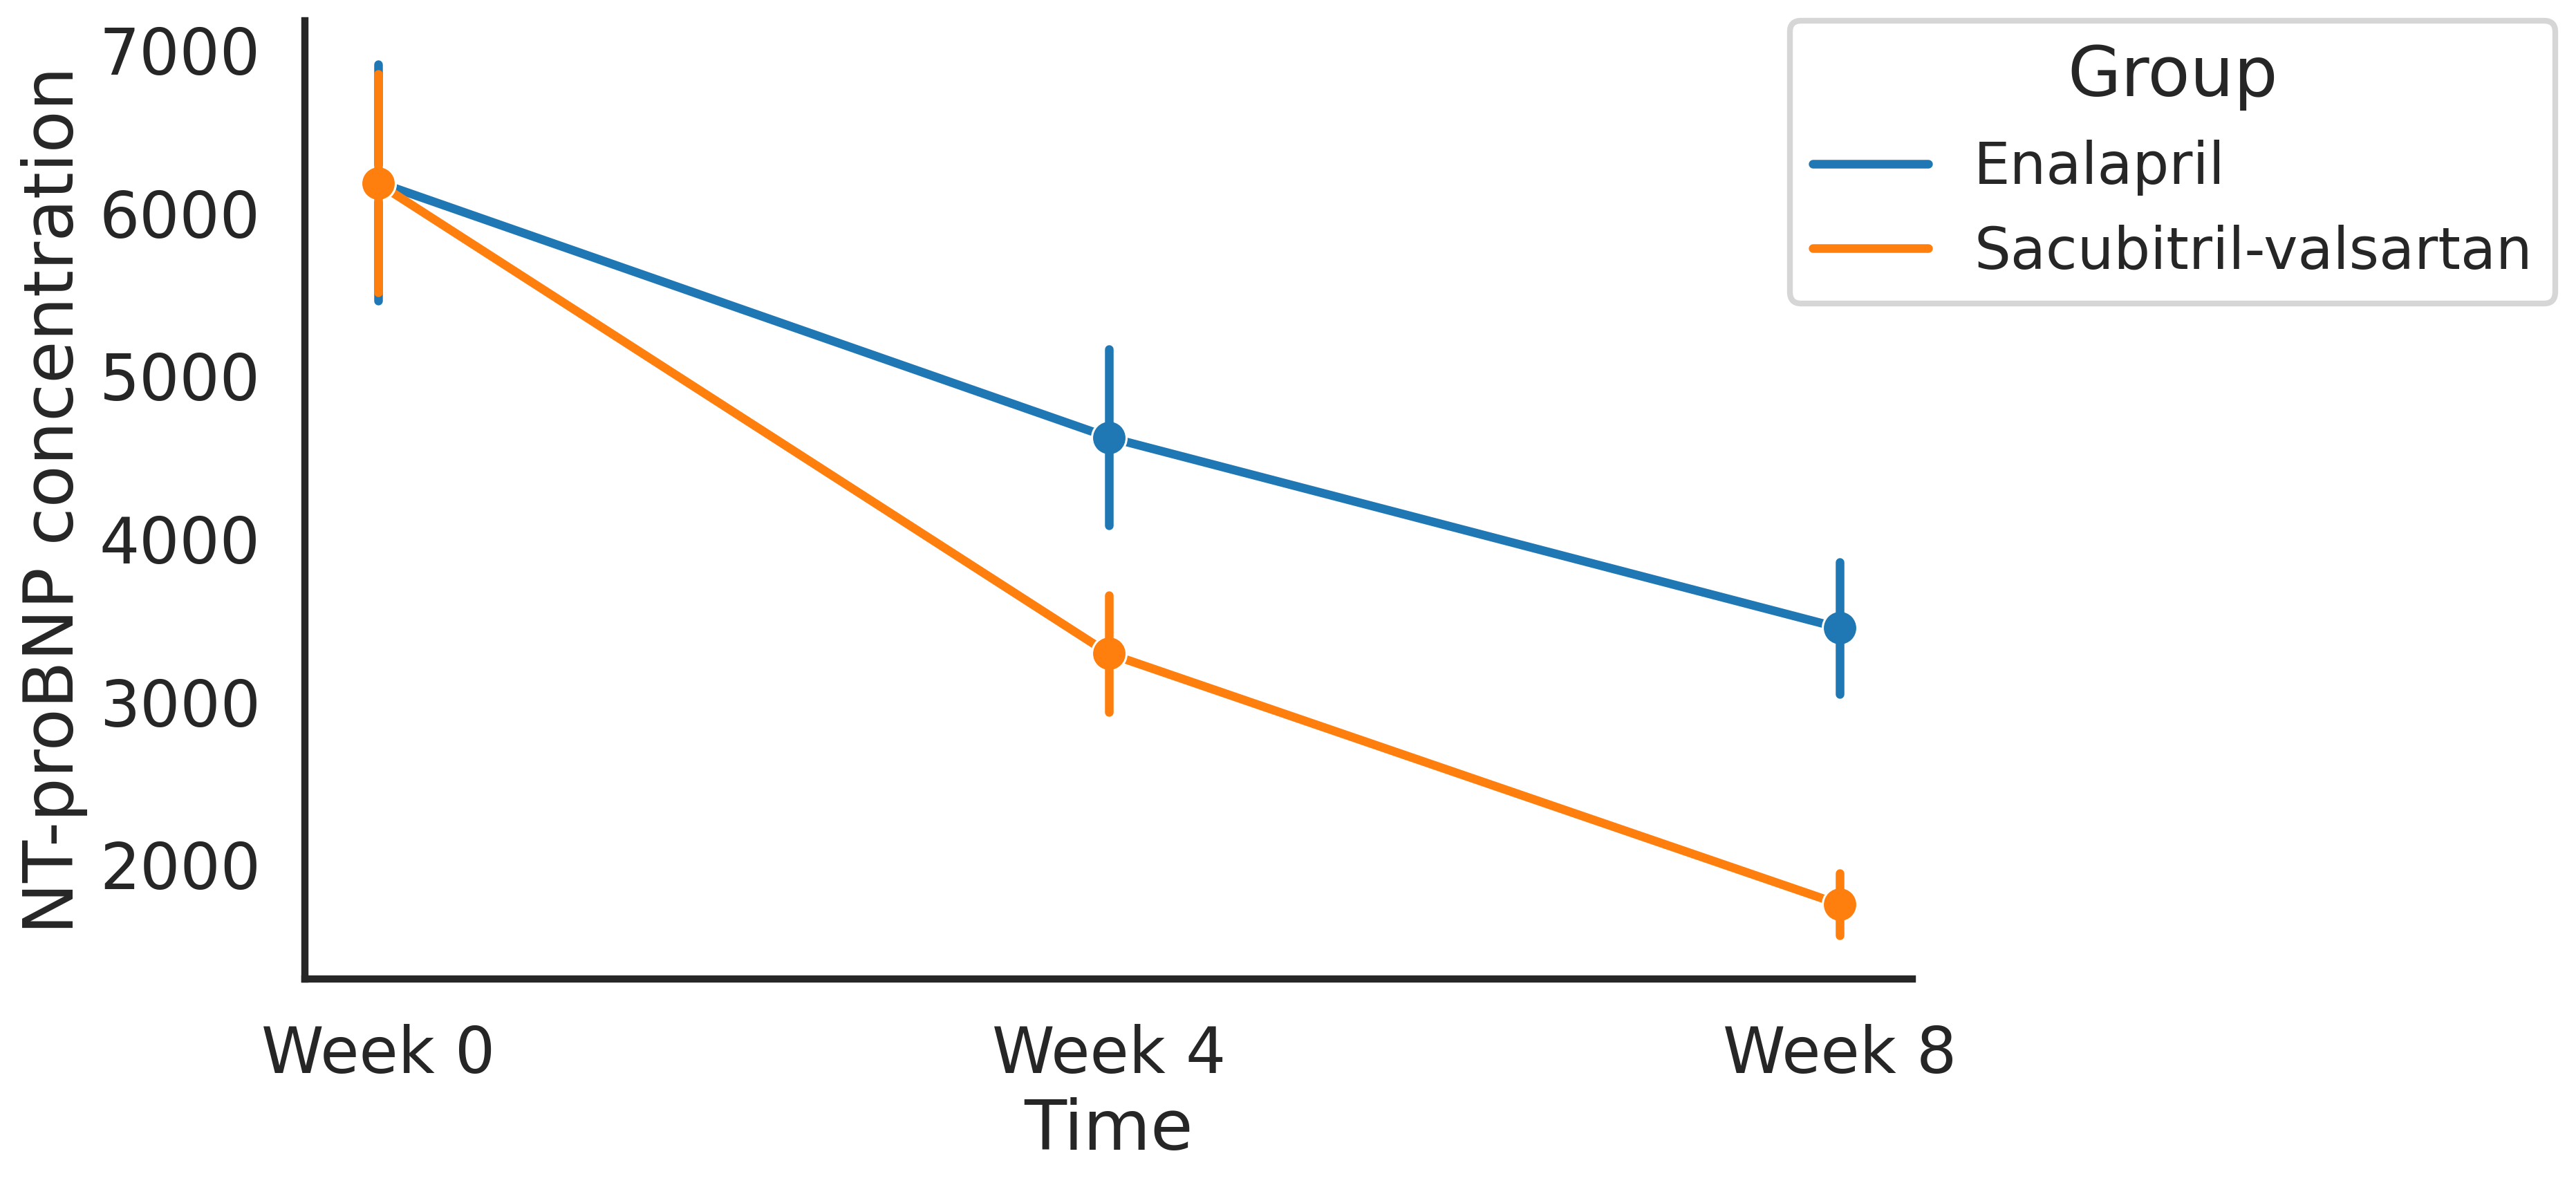

In [87]:
plt.figure(figsize = (10,6), dpi = 300)
#Using one of Seaborn's Plot-Styles
sns.set_style("white")
#Using one of Seaborn's Plot-Contexts
sns.set_context("poster")
#Plotting bar plot
ax = sns.lineplot(data=combined_df, x="Time", y="NT-proBNP concentration", hue="Group",errorbar='sd', err_style='bars', marker="o")
# Adjusting legend size and position
legend = ax.legend(title = "Group", loc = "upper right", bbox_to_anchor = (1.4, 1), borderaxespad = 0., fontsize = "small")
legend.get_title().set_fontsize("medium")
# Customizing major ticks on x-axis
custom_labels = ["Week 0", "Week 4", "Week 8"] #Customizing major ticks on x-axis
ax.set_xticklabels(custom_labels)
#Despining the plot
sns.despine()
#Saving the plot in vector form (.pdf) and using bbox_inches='tight'
plt.savefig("Lineplot.pdf", bbox_inches = "tight")

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Convert your categorical data into matrix data. (4 points)

In [88]:
dfGrouped=df.groupby(['Weight (kg)', 'Group']).mean()
dfGrouped = dfGrouped.reset_index()
print(dfGrouped)

     Weight (kg)                 Group        Age  Height (cm)  \
0           40.0             Enalapril  52.875000   183.250000   
1           40.0  Sacubitril-valsartan  52.750000   187.250000   
2           41.0             Enalapril  51.083333   191.750000   
3           41.0  Sacubitril-valsartan  50.923077   180.538462   
4           42.0             Enalapril  37.444444   174.888889   
..           ...                   ...        ...          ...   
155        117.0  Sacubitril-valsartan  46.600000   174.200000   
156        118.0             Enalapril  43.444444   188.222222   
157        118.0  Sacubitril-valsartan  71.000000   186.250000   
158        119.0             Enalapril  56.166667   174.166667   
159        119.0  Sacubitril-valsartan  42.800000   174.600000   

     Pre-treatment NT-proBNP (pg/mL)  Week 4 NT-proBNP (pg/mL)  \
0                        6420.654000               4796.228500   
1                        6191.683250               3300.167250   
2        

<ipython-input-88-b1fb9e291e3d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfGrouped=df.groupby(['Weight (kg)', 'Group']).mean()


In [89]:
matrixDF = dfGrouped.pivot('Group', 'Weight (kg)','Week 8 NT-proBNP (pg/mL)')
matrixDF.head()

<ipython-input-89-44d113616bf8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrixDF = dfGrouped.pivot('Group', 'Weight (kg)','Week 8 NT-proBNP (pg/mL)')


Weight (kg),40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0
Group,,,,,,,,,,,,,,,,,,,,,
Enalapril,3582.78275,3579.059917,3756.425333,3499.08800,3483.3751,3538.78625,3185.891333,3327.733000,3617.416375,3155.617000,...,3418.524500,3451.487700,3532.11975,3205.397500,3421.256556,3118.742200,3207.4795,3406.14775,3361.696333,3390.444333
Sacubitril-valsartan,1758.98925,1686.785846,1643.219500,1741.74075,2075.9690,1895.70880,1785.490750,1841.133429,1615.555500,1711.029857,...,1778.798125,1793.496667,1691.37500,2008.046333,1891.115833,1777.317333,1897.3875,1872.36850,1545.457750,1636.887200


2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

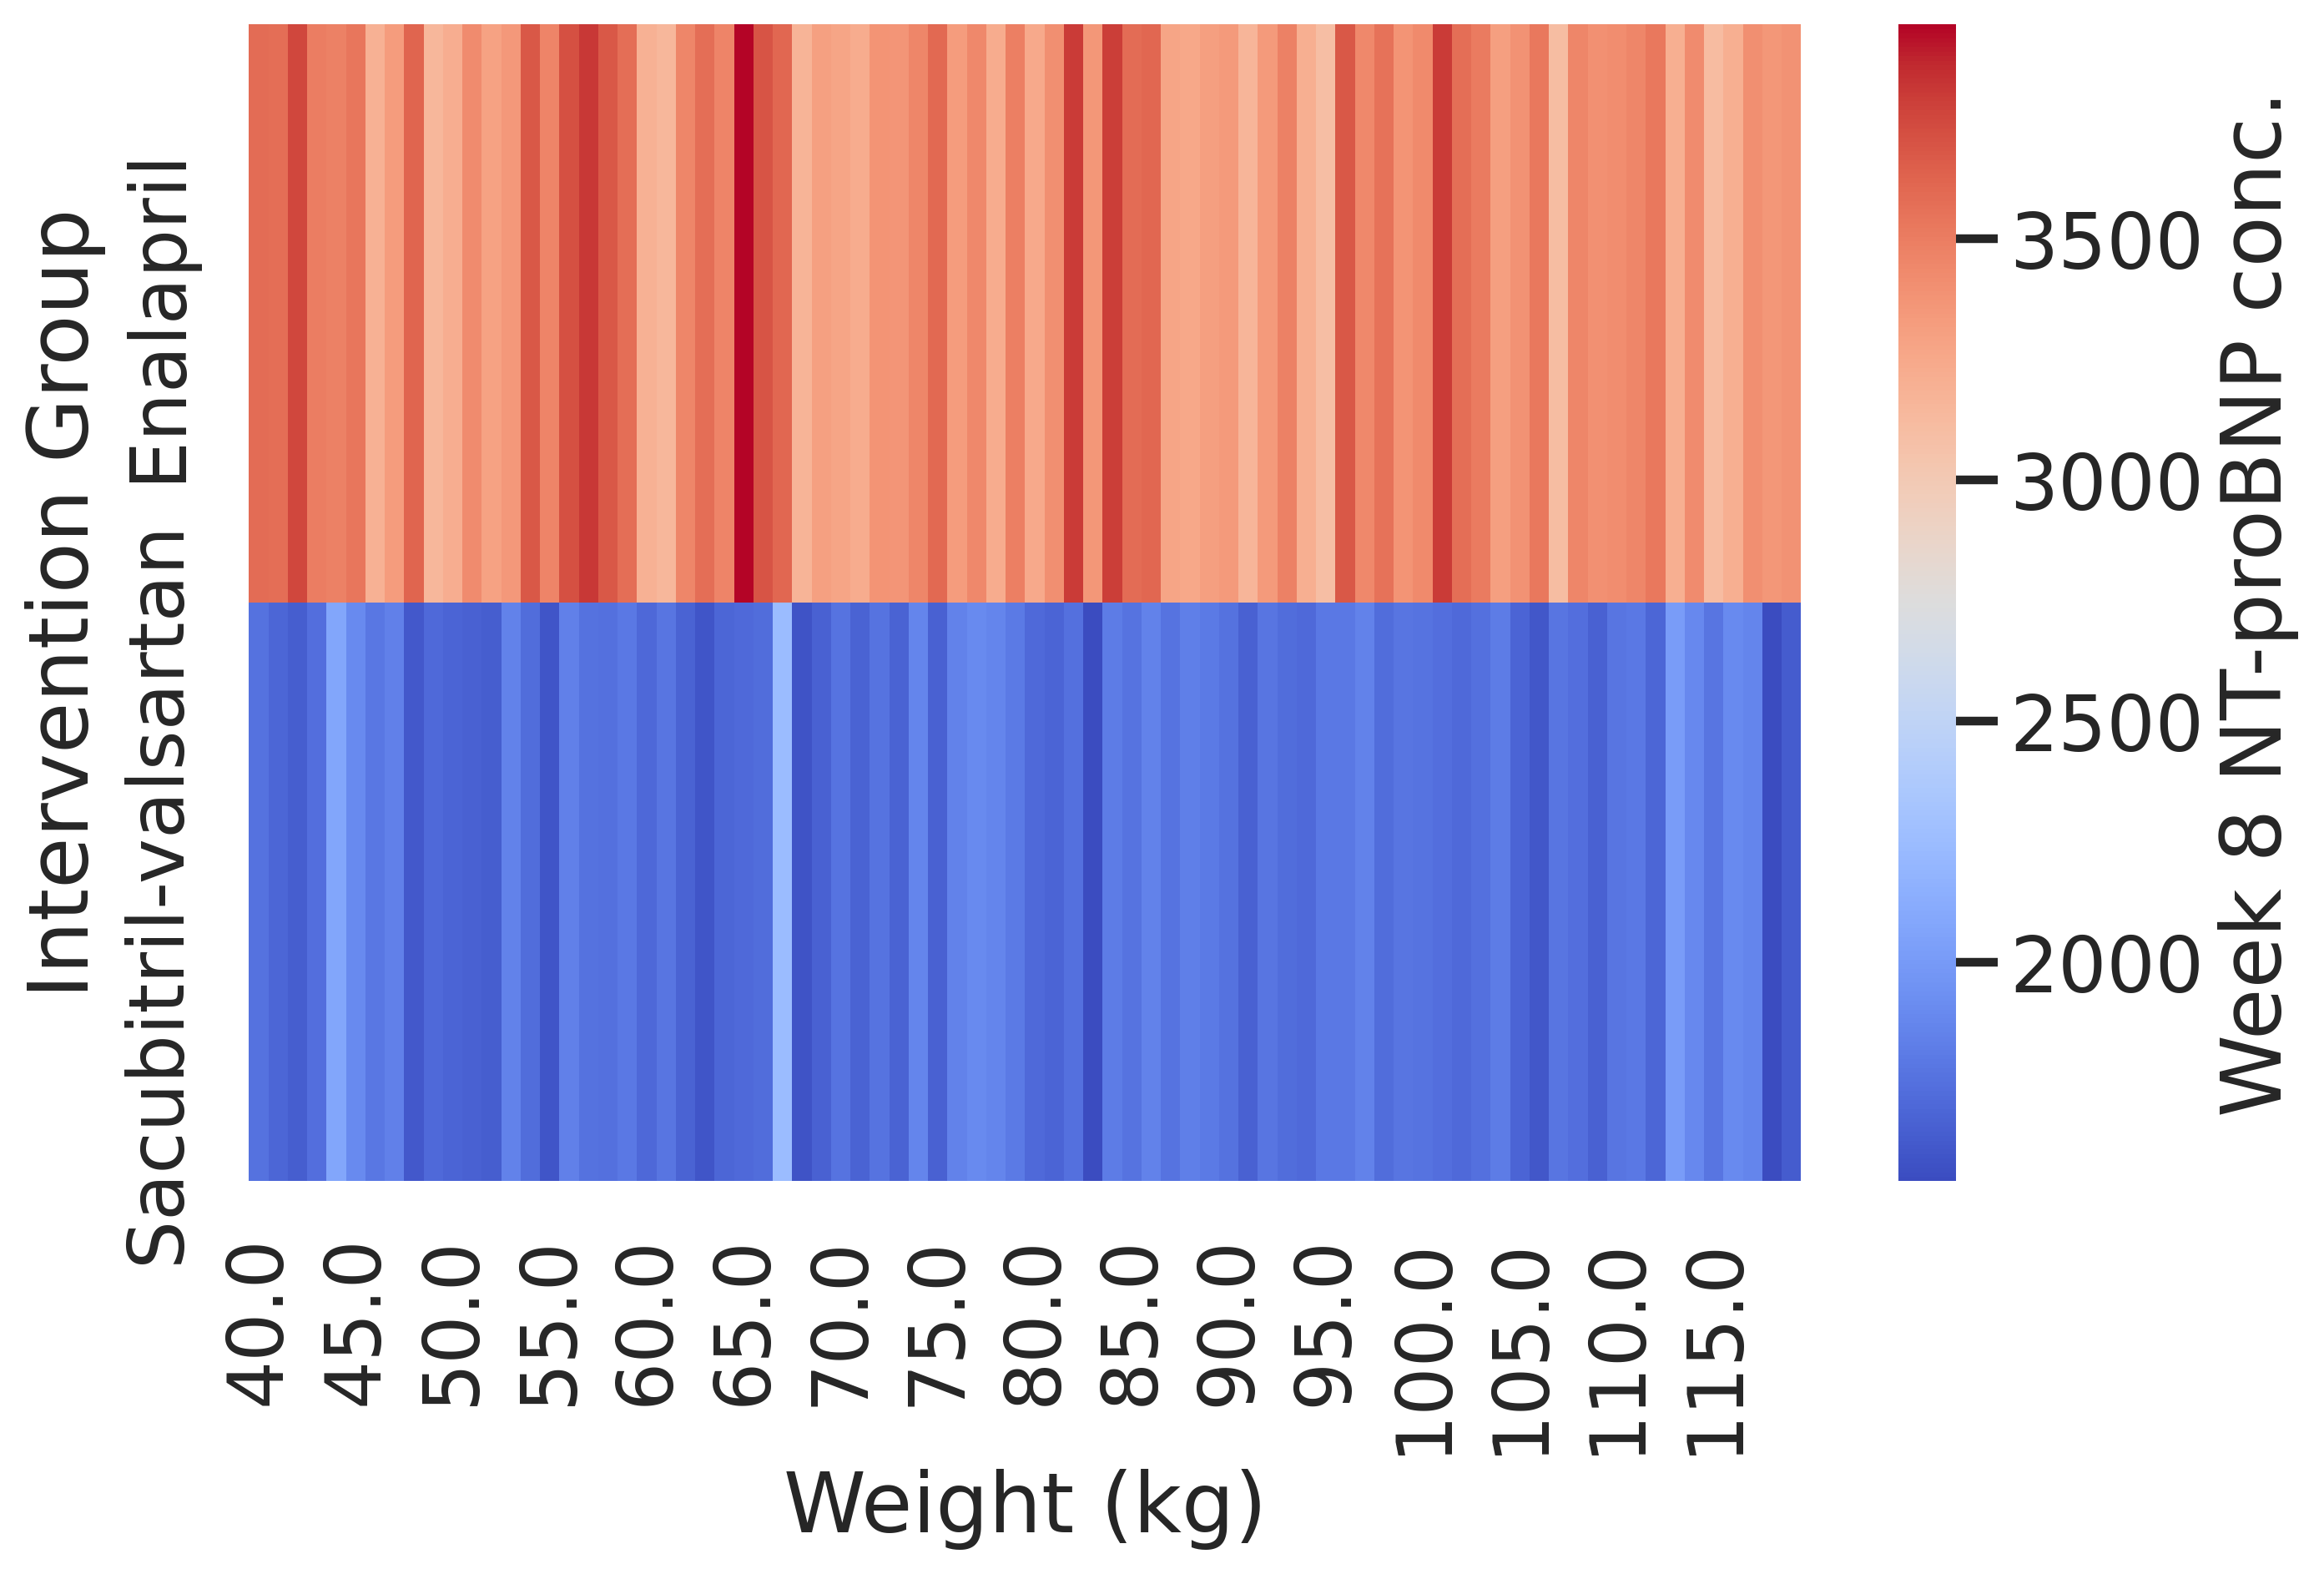

In [90]:
plt.figure(figsize = (10,6), dpi = 300)
#Using one of Seaborn's Plot-Contexts
sns.set_context("poster")
ax = sns.heatmap(data=matrixDF, cbar_kws={'label': 'Week 8 NT-proBNP conc.'}, cmap='coolwarm')
ax.set(ylabel='Intervention Group')
#Saving the plot in vector form (.pdf) and using bbox_inches='tight'
plt.savefig("Heatmap.pdf", bbox_inches = "tight")

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [91]:
stats_df = df_final.groupby('Group').agg(['mean', 'median', 'std'])
stats_df

<ipython-input-91-f4f1f9d9c023>:1: FutureWarning: ['Sex', 'Race', 'Ethnicity', 'Smoking history', 'Prior use of ACEi/ARB', 'Chronic renal insufficiency', 'Symptomatic hypotension', 'Hyperkalemia', 'Death'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_df = df_final.groupby('Group').agg(['mean', 'median', 'std'])


Age                   Height (cm)         \
                           mean median        std        mean median   
Group                                                                  
Enalapril             48.610619   48.5  18.534170  182.909292  184.0   
Sacubitril-valsartan  47.888158   47.0  18.121161  182.497807  184.0   

                                Weight (kg)                    \
                            std        mean median        std   
Group                                                           
Enalapril             18.120518   80.190265   80.5  23.505797   
Sacubitril-valsartan  17.937008   80.258772   81.0  22.832571   

                     Pre-treatment NT-proBNP (pg/mL)  ...  \
                                                mean  ...   
Group                                                 ...   
Enalapril                                6187.982478  ...   
Sacubitril-valsartan                     6181.567397  ...   

                     Week 8 NT-proBNP (pg/mL) Pre-treatment BNP (pg/mL)  \
                                          std                      mean   
Group                                                                     
Enalapril                          404.999995               1547.291489   
Sacubitril-valsartan               190.313923               1544.600147   

                                             \
                         median         std   
Group                                         
Enalapril             1515.0520  180.445534   
Sacubitril-valsartan  1502.1085  185.179102   

                     Left ventricular ejection fraction (%)           \
                                                       mean   median   
Group                                                                  
Enalapril                                         30.945270  30.0425   
Sacubitril-valsartan                              30.852173  30.3265   

                               BMI (kg/m^2)                       
                           std         mean     median       std  
Group                                                             
Enalapril             3.941595    24.718344  24.244148  8.890558  
Sacubitril-valsartan  3.875466    24.868394  24.448445  8.872425  

[2 rows x 27 columns]

What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:


1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the NT-proBNP levels before and after 4 weeks of treatment with sacubitril.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the NT-proBNP levels before and after 4 weeks of treatment with sacubitril.


In [92]:
# Filter the DataFrame for patients treated with Sacubitril
drugSac = df_final[df_final['Group'] == 'Sacubitril-valsartan']

# Assuming you have columns 'Before' and 'After' for the before and after readings
Before = drugSac['Pre-treatment NT-proBNP (pg/mL)']
After = drugSac['Week 4 NT-proBNP (pg/mL)']

# Perform a paired t-test
stats.ttest_rel(After, Before)


TtestResult(statistic=-197.04475748708091, pvalue=0.0, df=455)

<font color='red'>Conclusion:</font> The p value is less than 0.05, hence we accept the alternative hypothesis and conclude that there is a significant difference between the means of the NT-proBNP levels before and after 4 weeks of treatment with sacubitril. Hence, we interpret that the treatment worked in reducing the marker levels of NT-proBNP.

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the NT-proBNP levels before and after 8 weeks of treatment with sacubitril.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the NT-proBNP levels before and after 8 weeks of treatment with sacubitril.


In [93]:
# Assuming you have columns 'Before' and 'After' for the before and after readings
Before = drugSac['Pre-treatment NT-proBNP (pg/mL)']
After8 = drugSac['Week 8 NT-proBNP (pg/mL)']

# Perform a paired t-test
stats.ttest_rel(After8, Before)


TtestResult(statistic=-197.04475951440645, pvalue=0.0, df=455)

<font color='red'>Conclusion:</font> The p value is less than 0.05, hence we accept the alternative hypothesis and conclude that there is a significant difference between the means of the NT-proBNP levels before and after 8 weeks of treatment with sacubitril. Hence, we interpret that the treatment worked in reducing the marker levels of NT-proBNP.

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the NT-proBNP levels before and after 4 weeks of treatment with enalapril.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the NT-proBNP levels before and after 4 weeks of treatment with enalapril.


In [94]:
# Filter the DataFrame for patients treated with Sacubitril
drugEna = df_final[df_final['Group'] == 'Enalapril']

# Assuming you have columns 'Before' and 'After' for the before and after readings
BeforeE = drugEna['Pre-treatment NT-proBNP (pg/mL)']
AfterE = drugEna['Week 4 NT-proBNP (pg/mL)']

# Perform a paired t-test
stats.ttest_rel(AfterE, BeforeE)


TtestResult(statistic=-181.26105647527518, pvalue=0.0, df=451)

<font color='red'>Conclusion:</font> The p value is less than 0.05, hence we accept the alternative hypothesis and conclude that there is a significant difference between the means of the NT-proBNP levels before and after 4 weeks of treatment with enalapril. Hence, we interpret that the treatment worked in reducing the marker levels of NT-proBNP.


4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the NT-proBNP levels before and after 8 weeks of treatment with enalapril.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the NT-proBNP levels before and after 8 weeks of treatment with enalapril.


In [95]:
# Assuming you have columns 'Before' and 'After' for the before and after readings
BeforeE = drugEna['Pre-treatment NT-proBNP (pg/mL)']
AfterE8 = drugEna['Week 8 NT-proBNP (pg/mL)']

# Perform a paired t-test
stats.ttest_rel(AfterE8, BeforeE)


TtestResult(statistic=-181.26105919154924, pvalue=0.0, df=451)

<font color='red'>Conclusion:</font> The p value is less than 0.05, hence we accept the alternative hypothesis and conclude that there is a significant difference between the means of the NT-proBNP levels before and after 8 weeks of treatment with enalapril. Hence, we interpret that the treatment worked in reducing the marker levels of NT-proBNP.

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the week 4 NT-proBNP levels between the sacubitril and enalipril groups.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the week 4 NT-proBNP levels between the sacubitril and enalipril groups.



<Axes: xlabel='Group', ylabel='Week 4 NT-proBNP (pg/mL)'>

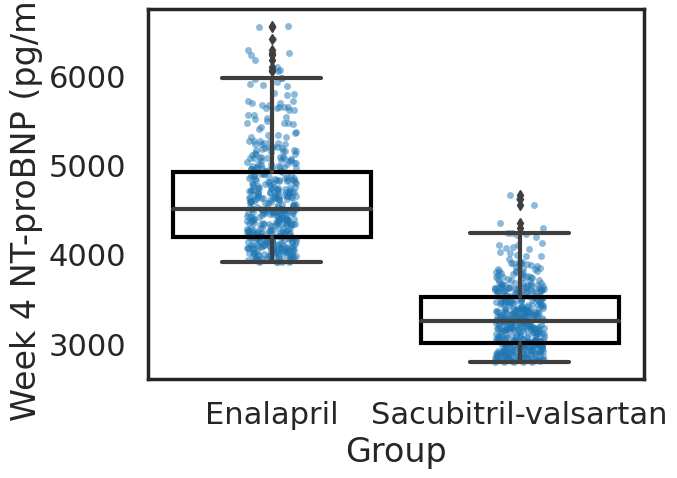

In [96]:
# Combined box and strip plot to explore potentially significant differences.
sns.boxplot(data = df_final, x='Group', y='Week 4 NT-proBNP (pg/mL)', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = df_final, x='Group', y='Week 4 NT-proBNP (pg/mL)', alpha=.5, zorder=0)

In [97]:
#Levene test to check difference in variances of the 2 samples
#Null hypothesis: There is no statistically significant difference between variances of the 2 samples (Week 4 marker levels in People administered enalapril or sacubitril).

#Alternate hypothesis: There is a statistically significant difference between the variances of the 2 samples.

ena = df_final.loc[df_final['Group'] == "Enalapril"]
sac = df_final.loc[df_final['Group'] == "Sacubitril-valsartan"]

stats.levene(ena['Week 4 NT-proBNP (pg/mL)'], sac['Week 4 NT-proBNP (pg/mL)'])

LeveneResult(statistic=45.18653064595733, pvalue=3.16583256528833e-11)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the variance of the week 4 NT-proBNP levels in people administered either enalapril or sacubitril. Hence, we can go ahead with Welch's t test.

In [98]:
stats.ttest_ind(ena['Week 4 NT-proBNP (pg/mL)'].dropna(), sac['Week 4 NT-proBNP (pg/mL)'].dropna(), alternative = 'two-sided', equal_var=False)

TtestResult(statistic=43.53726520654453, pvalue=6.795421768025421e-211, df=779.3645706583501)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the means of the week 4 NT-proBNP levels in people administered either enalapril or sacubitril. Hence, we can conclude that the treatments show major difference in reducing NT-proBNP levels after 4 weeks, and looking at the boxplot, sacubitril is more successful than enalapril in doing so.


6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the week 8 NT-proBNP levels between the sacubitril and enalipril groups.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the week 8 NT-proBNP levels between the sacubitril and enalipril groups.



<Axes: xlabel='Group', ylabel='Week 8 NT-proBNP (pg/mL)'>

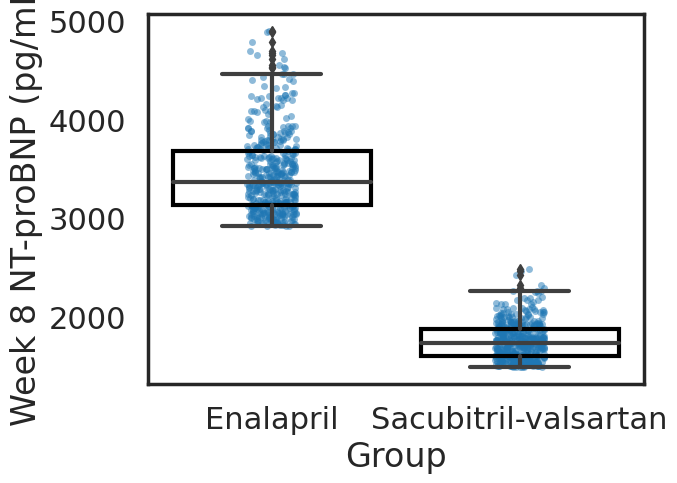

In [99]:
# Combined box and strip plot to explore potentially significant differences.
sns.boxplot(data = df_final, x='Group', y='Week 8 NT-proBNP (pg/mL)', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = df_final, x='Group', y='Week 8 NT-proBNP (pg/mL)', alpha=.5, zorder=0)

In [100]:
#Levene test to check difference in variances of the 2 samples
#Null hypothesis: There is no statistically significant difference between variances of the 2 samples (Week 8 marker levels in People administered enalapril or sacubitril).

#Alternate hypothesis: There is a statistically significant difference between the variances of the 2 samples.

ena = df_final.loc[df_final['Group'] == "Enalapril"]
sac = df_final.loc[df_final['Group'] == "Sacubitril-valsartan"]

stats.levene(ena['Week 8 NT-proBNP (pg/mL)'], sac['Week 8 NT-proBNP (pg/mL)'])

LeveneResult(statistic=134.82244926726386, pvalue=3.726980998534633e-29)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the variance of the week 8 NT-proBNP levels in people administered either enalapril or sacubitril. Hence, we can go ahead with Welch's t test.

In [101]:
stats.ttest_ind(ena['Week 8 NT-proBNP (pg/mL)'].dropna(), sac['Week 8 NT-proBNP (pg/mL)'].dropna(), alternative = 'two-sided', equal_var=False)

TtestResult(statistic=80.68138799562402, pvalue=0.0, df=639.6601714071213)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the means of the week 8 NT-proBNP levels in people administered either enalapril or sacubitril. Hence, we can conclude that the treatments show major difference in reducing NT-proBNP levels after 8 weeks, and looking at the boxplot, sacubitril is more successful than enalapril in doing so.

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the week 4 NT-proBNP levels between the sacubitril and enalipril group of patients over 60.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the week 4 NT-proBNP levels between the sacubitril and enalipril group of patients over 60.



<Axes: xlabel='Group', ylabel='Week 4 NT-proBNP (pg/mL)'>

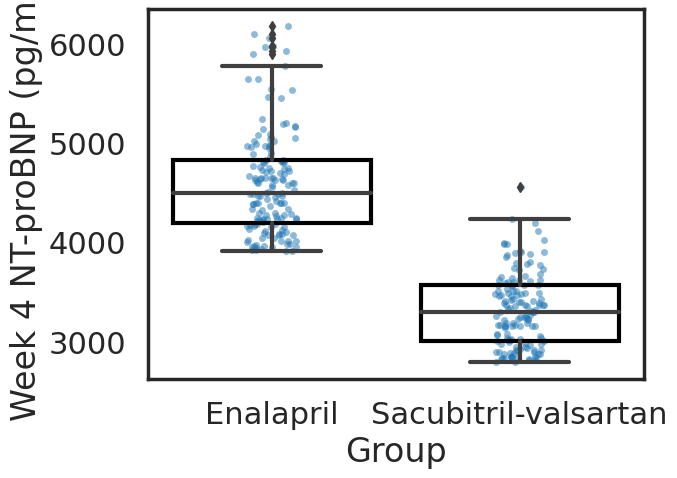

In [102]:
# Combined box and strip plot to explore potentially significant differences.
oversixty = df_final.loc[df_final['Age'] >= 60]
sns.boxplot(data = oversixty, x='Group', y='Week 4 NT-proBNP (pg/mL)', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = oversixty, x='Group', y='Week 4 NT-proBNP (pg/mL)', alpha=.5, zorder=0)

In [103]:
#Levene test to check difference in variances of the 2 samples
#Null hypothesis: There is no statistically significant difference between variances of the 2 samples (Week 4 marker levels in People over 60 administered enalapril or sacubitril).

#Alternate hypothesis: There is a statistically significant difference between the variances of the 2 samples.

ena = oversixty.loc[oversixty['Group'] == "Enalapril"]
sac = oversixty.loc[oversixty['Group'] == "Sacubitril-valsartan"]

stats.levene(ena['Week 4 NT-proBNP (pg/mL)'], sac['Week 4 NT-proBNP (pg/mL)'])

LeveneResult(statistic=9.11033834000541, pvalue=0.0027620455879121936)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the variance of the week 4 NT-proBNP levels in people over 60 administered either enalapril or sacubitril. Hence, we can go ahead with Welch's t test.

In [104]:
stats.ttest_ind(ena['Week 4 NT-proBNP (pg/mL)'].dropna(), sac['Week 4 NT-proBNP (pg/mL)'].dropna(), alternative = 'two-sided', equal_var=False)

TtestResult(statistic=24.598789465199893, pvalue=1.749559158666676e-71, df=275.52682028823295)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the means of the week 4 NT-proBNP levels in people over 60 administered either enalapril or sacubitril. Hence, we can conclude that the treatments show major difference in reducing NT-proBNP levels after 4 weeks, and looking at the boxplot, sacubitril is more successful even in elderly people than enalapril in doing so.

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

<font color='red'>Null hypothesis:</font> There is no significant difference between the means of the week 8 NT-proBNP levels between the sacubitril and enalipril group of patients over 60.

<font color='red'>Alternative hypothesis:</font> There is a significant difference between the means of the week 8 NT-proBNP levels between the sacubitril and enalipril group of patients over 60.



<Axes: xlabel='Group', ylabel='Week 8 NT-proBNP (pg/mL)'>

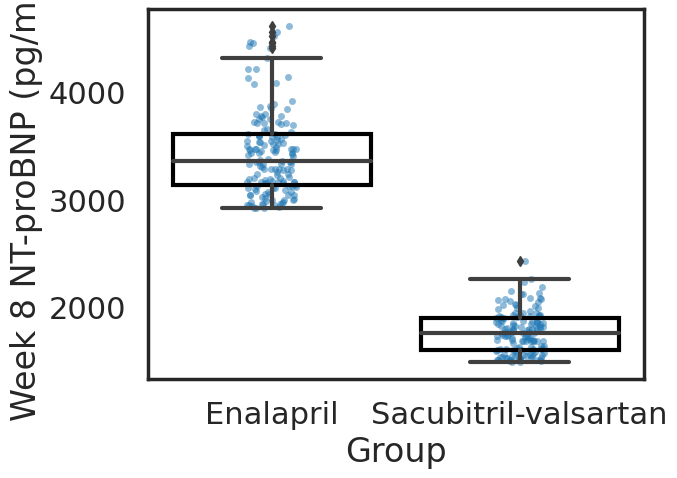

In [105]:
# Combined box and strip plot to explore potentially significant differences.
oversixty = df_final.loc[df_final['Age'] >= 60]
sns.boxplot(data = oversixty, x='Group', y='Week 8 NT-proBNP (pg/mL)', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = oversixty, x='Group', y='Week 8 NT-proBNP (pg/mL)', alpha=.5, zorder=0)

In [106]:
#Levene test to check difference in variances of the 2 samples
#Null hypothesis: There is no statistically significant difference between variances of the 2 samples (Week 8 marker levels in People over 60 administered enalapril or sacubitril).

#Alternate hypothesis: There is a statistically significant difference between the variances of the 2 samples.

ena = oversixty.loc[oversixty['Group'] == "Enalapril"]
sac = oversixty.loc[oversixty['Group'] == "Sacubitril-valsartan"]

stats.levene(ena['Week 8 NT-proBNP (pg/mL)'], sac['Week 8 NT-proBNP (pg/mL)'])

LeveneResult(statistic=35.896649390361404, pvalue=6.010642306470321e-09)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the variance of the week 8 NT-proBNP levels in people over 60 administered either enalapril or sacubitril. Hence, we can go ahead with Welch's t test.

In [107]:
stats.ttest_ind(ena['Week 8 NT-proBNP (pg/mL)'].dropna(), sac['Week 8 NT-proBNP (pg/mL)'].dropna(), alternative = 'two-sided', equal_var=False)

TtestResult(statistic=47.117933751859255, pvalue=1.0057862870139081e-119, df=228.6865257005773)

<font color='red'>Conclusion:</font> The p value is < than 0.05, hence we accept the alternate hypothesis and conclude that there is a significant difference between the means of the week 8 NT-proBNP levels in people over 60 administered either enalapril or sacubitril. Hence, we can conclude that the treatments show major difference in reducing NT-proBNP levels after 8 weeks, and looking at the boxplot, sacubitril is more successful even in elderly people than enalapril in doing so.

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

_**[ My answer ]**_

Yes, as per the previously run paired t tests  there is a statistically significant difference between pre-treatment NT-proBNP and week 4 NT-proBNP, and between pre-treatment and week 8 NT-proBNP levels in both sacubitril as well as enalapril groups.

Additionally, when these levels are compared drug wise, it appears that sacubitril is more effective than enalapril in reducing the NT-proBNP levels after a gap of 4 and 8 weeks.

#Making a probability matrix to export to Results directory on Github

In [108]:
#Generating matrix form of 2 variables to know whether Patients with/without chronic renal insufficiency is affecting the presence/absence of hyperkalemia
matrix=pd.crosstab(df_final["Chronic renal insufficiency"],df["Hyperkalemia"],margins=True)
matrix

Hyperkalemia,No,Yes,All
Chronic renal insufficiency,,,
No,417,42,459
Yes,402,47,449
All,819,89,908


In [109]:
# Copy the current matrix so that it can be converted into a probability matrix
p_matrix=matrix.copy()

# Get the total count of patients
total_patients = matrix.iloc[len(matrix.index) - 1, len(matrix) - 1]

# Divide each cell by total number of patients to create the probability matrix
p_matrix = p_matrix / total_patients
p_matrix

Hyperkalemia,No,Yes,All
Chronic renal insufficiency,,,
No,0.459251,0.046256,0.505507
Yes,0.442731,0.051762,0.494493
All,0.901982,0.098018,1.000000


In [110]:
#Calculating the probability of a hyperkalemia (A) given a history of chronic renal insufficiency (B):
#Formula: P(A/B)=P(AnB)/p(B)
# Given values from p_matrix
P_renal_insufficiency_and_hyperkalemia = 0.051762
P_renal_insufficiency = 0.494493

# Calculating the conditional probability
P_hyperkalemia_given_renal_insufficiency = P_renal_insufficiency_and_hyperkalemia / P_renal_insufficiency

# Printing the result
print("P(Hyperkalemia/Chronic renal_insufficiency)=", P_hyperkalemia_given_renal_insufficiency)

P(Hyperkalemia/Chronic renal_insufficiency)= 0.10467691150329732


<font color = "red">Interpretation of calculated conditional possibility</font>

There is a 10.47% chance that chronic renal insufficiency would lead to a hyperkalemic condition.

In [111]:
#Ensuring conversion of probability matrix to pandas dataframe
probdf=pd.DataFrame(p_matrix)
probdf

Hyperkalemia,No,Yes,All
Chronic renal insufficiency,,,
No,0.459251,0.046256,0.505507
Yes,0.442731,0.051762,0.494493
All,0.901982,0.098018,1.000000


In [112]:
#Exporting probability matrix as dataframe
probdf.to_csv("/content/Probability_matrix.csv",index=True,header=True)

#Publication on Github

In [113]:
%%bash
rm -r /content/sample_data

In [114]:
%%bash
cat>.gitignore
.*
.gitignore

In [115]:
%%bash
git config --global user.email "ruchirav@usc.edu"
git config --global user.name "Ruch"

In [116]:
%%bash
git init
ls -a

Initialized empty Git repository in /content/.git/
.
..
Combinedplot.pdf
.config
.git
.gitignore
Heatmap.pdf
Lineplot.pdf
Probability_matrix.csv
Violinplot.pdf


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


In [117]:
%%bash
mkdir StartingData Code Results Figures

In [118]:
%%bash
cd /content
pwd
cat>README.md
Contains all folders which talk about starting data, data manipulation and data cleaning through code, results and publication ready figures.

/content


In [119]:
%%bash
cd /content/StartingData
pwd
cat>README.md
Contains intial dataset on which all analysis was performed.

/content/StartingData


In [120]:
%%bash
cd /content/Code
pwd
cat>README.md
Contains all code to clean data, perform the analysis, and generate results and figures.

/content/Code


In [121]:
%%bash
cd /content/Results
pwd
cat>README.md
Contains probability matrix generated to calculate conditional probability of death given worsening heart failure.

/content/Results


In [122]:
%%bash
cd /content/Figures
pwd
cat>README.md
Contains violin plot(pre-treatment NT-proBNP (pg/ml) vs smoking history), combined plot (box+strip) for pre-treatment BNP (pg/ml) vs smoking history, line plot (NT-proBNP conc vs time in weeks), heatmap(intervention group, weight and wk 8 NT-pro BNP conc.), to understand relationship and distribution among various variables.

/content/Figures


In [123]:
%%bash
git add -A
git diff --name-only --cached

Code/README.md
Combinedplot.pdf
Figures/README.md
Heatmap.pdf
Lineplot.pdf
Probability_matrix.csv
README.md
Results/README.md
StartingData/README.md
Violinplot.pdf


In [ ]:
%%bash
git commit -m "Captured snapshot of current Git repo"

In [ ]:
%%bash
ssh-keygen -t ed25519 -C 'ruchirav@usc.edu' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

In [ ]:
%%bash
cat ~/.ssh/id_ed25519

In [ ]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

In [ ]:
%%bash
cat ~/.ssh/id_ed25519.pub

In [ ]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

In [ ]:
%%bash
git remote add origin https://github.com/ruch555/Final_project_CXPT501.git
git branch -M main
git push -u origin main